# Dataset utilizado: diabetes

### Lucas Yudi Sugi - 9293251
### Kelvin Guilherme de Oliveira - 9293286

Inicialmente iremos avaliar graficamente o dataset para ter um melhor entendimento do mesmo.

In [1]:
#Importando todos os modulos necessarios para a analise exploratoria de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Leitura do dataset com o pandas
dataset = pd.read_table('./datasets/diabetes/diabetes.tab.txt')

#Mostrando dataset (Apenas uma parte)
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


A partir da análise anterior e da leitura do site https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html podemos identificar qual será o objetivo da análise assim como quais serão os atributos de interesse.

Desse modo, temos como objetivo entender melhor nosso dataset realizando limpezas, transformações, descobertas de insights e etc para que os algoritmos de machine learning possam fazer melhores previsões.

Definido o objetivo, as seguintes perguntas foram formuladas: <br>
1 - Como a progressão da doença é impactada pelo sexo do paciente. <br>
2 - Como a progressão da doença é impactada pela faixa etária do paciente. <br>
3 - Qual medida está mais correlacionada com a progressão da doença. <br>

Para que se possa avaliar tais perguntas, os seguintes atributos foram considerados: <br>
Age - Numérico <br>
Sex - Simbólico categórico <br>
Ldl (S1) - Numérico intervalar <br>
Hdl (S2) - Numérico racional / Numérico intervalar <br>
Glu (S3) - Numérico intervalar <br>

Para os atributos Age,Ldl,Hdl,Glu as operações que fazem sentindo são média,moda, correlação, entre outras estatísticas. Para o gênero, faz sentido realizar uma contagem, por exemplo.

Deve-se salientar que tais atributos foram escolhidos, por acreditarmos que eles representam melhor o problema. Isso foi possível, após entendermos um pouco como que funciona a diabete (https://pt.wikipedia.org/wiki/Diabetes_mellitus). Ou seja, após a análise do domínio do problema, avaliamos que estes atributos são os que mais afetam a diabete.

-------------------------------------------------------------------------------------------------------------------

Iremos agora realizar uma análise exploratória dos dados na tentativa de responder as perguntas realizadas. Inicialmente iremos verificar a relação entre os genêros com a progressão de diabete por meio da média e desvio padrão. Isso nos ajudará a responder a questão 1.

In [2]:
#Extração da coluna SEX com filtro para cada genero
male = dataset[dataset.SEX == 1].Y
female = dataset[dataset.SEX == 2].Y

print("Progressao media e desvio padrao de diabetes para os homens: " + str(male.mean()) + " " + str(male.std()))
print("Progressao media e desvio padrao de diabetes para as mulheres: " + str(female.mean())+" " +str(female.std()))

Progressao media e desvio padrao de diabetes para os homens: 149.0212765957447 75.90578093636823
Progressao media e desvio padrao de diabetes para as mulheres: 155.66666666666666 78.45331306004283


Realizado a análise para o genêro, iremos verificar a relação entre os outros atributos. Para isso é necessário extrair apenas o necessário do dataset.

In [3]:
#Extracao dos atributos necessários
diabete = dataset.iloc[:,[0,4,5,6]].copy()

#Renomeando columnas
diabete.columns = ['AGE','LDL','HDL','GLU']

#Novo dataset
diabete.head()

,AGE,LDL,HDL,GLU
0,59,157,93.2,38.0
1,48,183,103.2,70.0
2,72,156,93.6,41.0
3,24,198,131.4,40.0
4,50,192,125.4,52.0


In [4]:
#Extracao da classe
target = dataset.iloc[:,[10]].copy()

#Target ou classe
target.head()

,Y
0,151
1,75
2,141
3,206
4,135


Com a extração dos dados realizados, nós iremos graficamente analisar a correlação entre os atributos e a variavel resposta(target). Isso porque é com esta medida estatística que será possível responder as questões 2 e 3 feitas anteriormente.

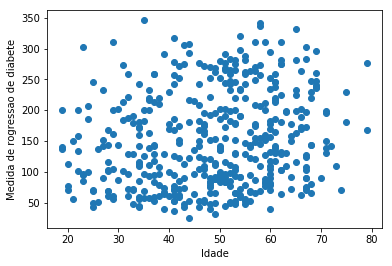

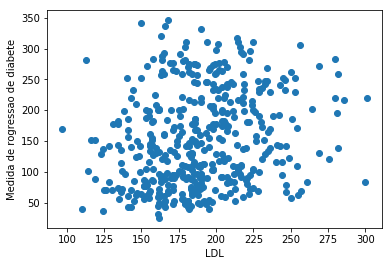

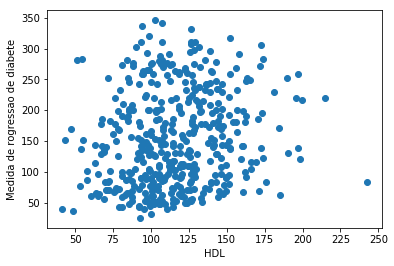

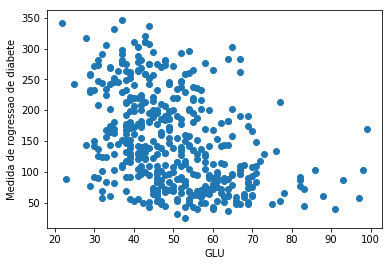

In [5]:
#Avaliando a idade com a progressao da doenca
plt.scatter(diabete.AGE.values,target.Y.values)
plt.xlabel('Idade')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o LDL com a progressao da doenca
plt.scatter(diabete.LDL.values,target.Y.values)
plt.xlabel('LDL')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o HDL com a progressao da doenca
plt.scatter(diabete.HDL.values,target.Y.values)
plt.xlabel('HDL')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o GLU com a progressao da doenca
plt.scatter(diabete.GLU.values,target.Y.values)
plt.xlabel('GLU')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

Vamos analisar também numericamente

In [6]:
print("Correlacao entre idade e diabete " + str(np.corrcoef(diabete.AGE.values,target.Y.values)[0,1]))
print("Correlacao entre LDL e diabete " + str(np.corrcoef(diabete.HDL.values,target.Y.values)[0,1]))
print("Correlacao entre HDL e diabete " + str(np.corrcoef(diabete.LDL.values,target.Y.values)[0,1]))
print("Correlacao entre GLU e diabete " + str(np.corrcoef(diabete.GLU.values,target.Y.values)[0,1]))

Correlacao entre idade e diabete 0.18788875071891972
Correlacao entre LDL e diabete 0.17405358696874254
Correlacao entre HDL e diabete 0.21202248101455065
Correlacao entre GLU e diabete -0.39478925067091863


Com a análise feita anteriormente, podemos inicialmente realizar as seguintes hipóteses para as questões:

1)Como a média da progressão de diabete é muito similar entre os dois genêros assim como o seu desvio padrão é relativamente próximo, podemos inferir que o genêro não possui relação com a doença.
2)A partir do gráfico a das medidas de correlação fica claro que não há uma relação muito forte entre idade e diabete.
3)A partir do gráfico e das medidas de correlação verificamos que a medida GLU é aquela que possui mais dependência com a progressão da doença (quase -0.40). Entretanto, tal correlação é negativa, o que nos indica que quanto maior o nível de glutamina no sangue, menor é a probabilidade da doença se desenvolver.

-------------------------------------------------------------------------------------------------------------------

O dataset não possui nenhum problema de "missing values" ou outliers, por ser um dataset que já foi estudado e tratado há bastante tempo. Por causa disso, não houve problemas em analisar o conjunto.

-------------------------------------------------------------------------------------------------------------------

## Dataset utilizado: Cadastro matrículas região sudeste sp 2012

1) Baseado na descrição do conjunto de dados formule algumas hipótese, perguntas que você acha que
podem ser respondidas com este conjunto de dados. Tente formular até 3 questões. Numere
cada questão.

2) Escolha 5 atributos que você acha representar bem o problema e faça uma análise dos tipos de
atributos e quais operações fazem sentido para cada um. Justifique a escolha desses atributos no
contexto do conjunto de dados e com relação às hipótese/questões levantadas na pergunta 1.

3) Faça uma análise exploratória com as medidas vistas em aula (média, mediana, moda, ...) nos
atributos anteriormente selecionados. Explique o porque você usou tal medida e como ela ajuda no
entendimento do conjunto de dados. Sinta-se livre para utilizar outras medidas, mas explique porque
você está usando elas. Se achar necessário, pode utilizar mais atributos na análise

4) Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser
respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para
questões

5)  Quais problemas o conjunto de dados apresenta e como isso impactou formulação e
entendimento do conjunto de dados e o problema que ele representa. Argumente. Por problemas
entenda valores ausentes, inconsistências e etc.